## ML3-분류
이진분류, 분류모델 평가지표

#### mnist 자료 사용

In [17]:
from sklearn.datasets import fetch_openml 
mnist = fetch_openml('mnist_784', version=1)

X, y = mnist["data"], mnist["target"]

# y의 type 바꾸기
import numpy as np 
y = y.astype(np.uint8)

# train / test  set 나누기
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

(-0.5, 27.5, 27.5, -0.5)

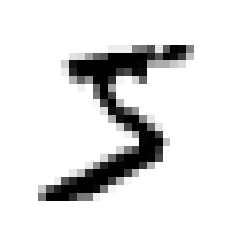

In [18]:
# 첫번째 자료의 이미지 그려보기
import matplotlib as mpl 
import matplotlib.pyplot as plt 
some_digit = X.iloc[0] 
some_digit_image = np.array(some_digit).reshape(28, 28) 
plt.imshow(some_digit_image, cmap=mpl.cm.binary) 
plt.axis("off")

### 이진 분류기 훈련 - SGDClassifier (확률적 경사하강법)
- 한번에 하나씩 훈련 샘플을 독립적으로 처리 -> 큰 데이터셋에 효율적임. 
- 온라인 학습에 적절함

In [11]:
y_train_5 = (y_train == 5)  # y_train이 5인 경우
y_test_5 = (y_test == 5)

from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=2020) 
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=2020)

In [13]:
sgd_clf.predict([X.iloc[0]])

array([ True])

In [19]:
sgd_clf.predict([X.iloc[48]])

array([ True])

In [20]:
(y[0], y[48])

(5, 9)

(-0.5, 27.5, 27.5, -0.5)

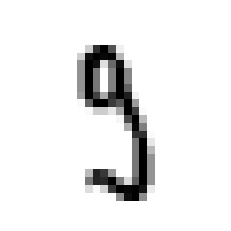

In [22]:
some_digit = X.iloc[48] 
some_digit_image = np.array(some_digit).reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary) 
plt.axis("off")


### 성능 측정

#### 교차 검증
- cross_val_score() : k-fold cv

In [24]:
from sklearn.model_selection import cross_val_score 
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.96975, 0.94815, 0.96385])

#### 오차 행렬
- confusion_matrix()
- cross_val_predict(): 각 fold에서 얻은 prediction 반환

In [25]:
from sklearn.model_selection import cross_val_predict 
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
from sklearn.metrics import confusion_matrix 
confusion_matrix(y_train_5, y_train_pred)

array([[53073,  1506],
       [  859,  4562]], dtype=int64)

#### precision: 정밀도

In [26]:
from sklearn.metrics import precision_score
precision_score(y_train_5, y_train_pred)

0.7518127883981542

#### recall: 재현율

In [27]:
from sklearn.metrics import recall_score
recall_score(y_train_5, y_train_pred)

0.8415421508946689

#### f1 score

In [28]:
from sklearn.metrics import f1_score 
f1_score(y_train_5, y_train_pred)

0.7941509269736269

#### decision function: 결정함수
각 샘플의 점수를 계산

In [30]:
sgd_clf.decision_function([X.iloc[0]])

array([2424.34912726])

#### ROC curve

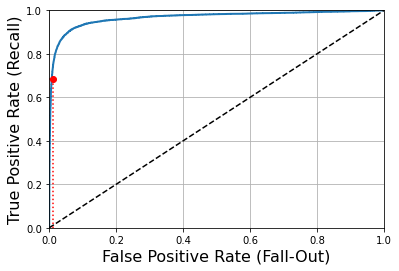

In [33]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

from sklearn.metrics import roc_curve 
fpr, tpr, thresholds1 = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None): 
    plt.plot(fpr, tpr, linewidth=2, label=label) 
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal 
    plt.axis([0, 1, 0, 1]) 
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16) 
    plt.grid(True)
    
plot_roc_curve(fpr, tpr)

from sklearn.metrics import precision_recall_curve 
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)] 
y_train_pred_90 = (y_scores >= threshold_90_precision) 
recall_s = recall_score(y_train_5, y_train_pred_90)
plt.plot([1-tpr[fpr[fpr<recall_s].shape], 1-tpr[fpr[fpr<recall_s].shape]], [0., recall_s], "r:") 
plt.plot([0.0, 1-tpr[fpr[fpr<recall_s].shape]], [recall_s, recall_s], "r:") 
plt.plot([1-tpr[fpr[fpr<recall_s].shape]], [recall_s], "ro")

#### AUC (Area Under Curve)

In [34]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9668937517833468

## ML4 - 회귀

In [6]:
import numpy as np
X = 2 * np.random.rand(100, 1)   # uniform
y = 4 + 3 * X + np.random.randn(100, 1) # standard normal
X_new = np.array([[0], [2]])

#### 선형회귀

In [5]:
from sklearn.linear_model import LinearRegression 
lin_reg = LinearRegression() 
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.90541626]), array([[3.01119682]]))

In [7]:
lin_reg.predict(X_new)

array([[3.90541626],
       [9.9278099 ]])

#### SGD(확률적 경사 하강법)

In [8]:
from sklearn.linear_model import SGDRegressor 
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=777) 
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=777)

In [9]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.85515196]), array([3.17403649]))

In [10]:
sgd_reg.predict(X_new)

array([ 3.85515196, 10.20322494])

#### 다항 회귀

In [11]:
# 2차 방정식으로 비선형 데이터 생성: y = 0.5x^2+x+2
import numpy as np 
import numpy.random as rnd 
np.random.seed(2020) 
m = 100 
X = 6 * np.random.rand(m, 1) - 3 
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [12]:
from sklearn.preprocessing import PolynomialFeatures 
poly_features = PolynomialFeatures(degree=2, include_bias=False) 
X_poly = poly_features.fit_transform(X) 
X[0]

array([2.91766097])

* polynomialFeatures 함수 이용해서 degree에 2 대신 더 높은 숫자를 넣으면 높은 차원의 다항회귀도 적합할 수 있음.

In [15]:
X_poly[0]   # x값과 x의 2차항

array([2.91766097, 8.51274555])

In [16]:
# LinearRegression 적용
lin_reg = LinearRegression() 
lin_reg.fit(X_poly, y)

LinearRegression()

In [17]:
lin_reg.intercept_, lin_reg.coef_

(array([2.12101388]), array([[1.05245102, 0.48033081]]))

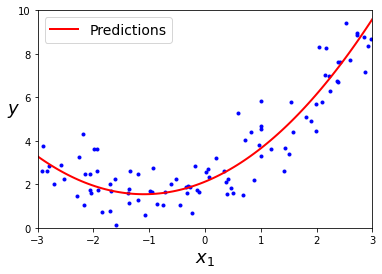

In [21]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1) 
X_new_poly = poly_features.transform(X_new) 
y_new = lin_reg.predict(X_new_poly) 
plt.plot(X, y, "b.") 
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions") 
plt.xlabel("$x_1$", fontsize=18) 
plt.ylabel("$y$", rotation=0, fontsize=18) 
plt.legend(loc="upper left", fontsize=14) 
plt.axis([-3, 3, 0, 10])
## [-3, 3, 0, 10]
plt.show()

#### 릿지 회귀

In [23]:
np.random.seed(2020) 
m = 20 
X = 3 * np.random.rand(m, 1)     # m * 1 matrix 형태로 N(0,1) 따르는 데이터 생성
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5 
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [25]:
from sklearn.linear_model import Ridge 
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=777) 
ridge_reg.fit(X, y)

Ridge(alpha=1, random_state=777, solver='cholesky')

In [26]:
ridge_reg.predict([[1.5]])

array([[1.86016341]])

#### 랏쏘 회귀

In [27]:
from sklearn.linear_model import Lasso 
lasso_reg = Lasso(alpha=0.1) 
lasso_reg.fit(X, y)

lasso_reg.predict([[1.5]])

array([1.8437758])

Elastic Net

In [28]:
from sklearn.linear_model import ElasticNet 
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=777) 
elastic_net.fit(X, y)

elastic_net.predict([[1.5]])

array([1.84970189])

#### 로지스틱회귀

In [29]:
from sklearn import datasets 
iris = datasets.load_iris()

X = iris["data"][:, 3:] 
y = (iris["target"] == 2).astype(np.int)

In [30]:
from sklearn.linear_model import LogisticRegression 
log_reg = LogisticRegression(solver="lbfgs", random_state=777) 
log_reg.fit(X, y)

LogisticRegression(random_state=777)

In [35]:
log_reg.predict([[0.5]])

array([0])

In [36]:
log_reg.predict([[1.8]])

array([1])

- multinomial - softmax regression

In [37]:
X = iris["data"][:, (2, 3)] 
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=777) 
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=777)

In [38]:
softmax_reg.predict([[5, 2]])

array([2])

In [39]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

### ML5 - SVM
- 선형 혹은 비선형 분류, 회귀 모두 사용 가능.
- 복잡한 분류 문제에 잘 맞음
- 작거나 중간 크기의 데이터
- scale에 민감함 => 사용 전에 꼭 조정하자!

#### 선형 SVM 분류
iris 데이터의 petal.length, petal.width를 이용해서 virginica를 분류

- sklearn의 LinearSVC 이용

In [2]:
import numpy as np 
from sklearn import datasets 
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import LinearSVC

iris = datasets.load_iris() 
X = iris["data"][:, (2, 3)] 
y = (iris["target"] == 2).astype(np.float64) # Virginica

In [3]:
svm_clf = Pipeline([ 
    ("scaler", StandardScaler()),     # 스케일링
    ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=2020)), #모델 객체 생성
]) 
svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc',
                 LinearSVC(C=1, loss='hinge', random_state=2020))])

In [5]:
svm_clf.predict([[5.5, 2.5]])

array([1.])

In [6]:
svm_clf.predict([[4.25, 1.0]])

array([0.])

- SVC 이용

In [7]:
from sklearn.svm import SVC 

svm_clf_SVC = Pipeline([ 
    ("scaler", StandardScaler()), 
    ("SVC_linear", SVC(kernel='linear',C=1.0, random_state=2020)), 
]) 
svm_clf_SVC.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('SVC_linear', SVC(kernel='linear', random_state=2020))])

In [8]:
svm_clf_SVC.predict([[5.5, 2.5]])

array([1.])

In [9]:
svm_clf_SVC.predict([[4.25, 1.0]])

array([0.])

- SGDClassifier 이용      
linearSVC만큼 빠르게 수렴하지는 않지만 data가 매우 크거나 온라인 학습으로 분류 문제를 다룰 때 유용함.

In [10]:
from sklearn.linear_model import SGDClassifier 
m = X.shape[0] 
C = 1.0 
svm_clf_SGD = Pipeline([ 
    ("scaler", StandardScaler()), 
    ("SGD_linear", SGDClassifier(loss="hinge",alpha = 1/(m*C), random_state=2020)), 
]) 
svm_clf_SGD.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('SGD_linear',
                 SGDClassifier(alpha=0.006666666666666667, random_state=2020))])

In [11]:
svm_clf_SGD.predict([[5.5, 2.5]])

array([1.])

In [12]:
svm_clf_SGD.predict([[4.25, 1.0]])

array([0.])

#### 비선형 SVM 분류
선형으로는 분류가 불가능한 경우.

- LinearSVC 이용
    - polynomial features 변환기 이용해서 다항변수 만들기
    - 스케일 조정
    - 분류기 생성

In [13]:
from sklearn.datasets import make_moons 
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import LinearSVC

X, y = make_moons(n_samples=100, noise=0.15, random_state=2020)

polynomial_svm_clf = Pipeline([ 
    ("poly_features", PolynomialFeatures(degree=3)), 
    ("scaler", StandardScaler()), 
    ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=2020)) 
]) 
polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=2020))])

- SVC 이용: kernel trick(실제 특성은 추가 안하면서 다항식의 특성을 추가한 것과 같은 결과를 내는 것)
    - 스케일 조정
    - SVC(kernel="poly") 이용.
    - 모델이 과대적합이면 다항식 차수 내리기.
    - coef0: 모델이 높은 차수와 낮은 차수에 얼마나 영향을 받을지 조절

In [14]:
from sklearn.svm import SVC 
poly_kernel_svm_clf = Pipeline([ 
    ("scaler", StandardScaler()), 
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5)) 
]) 
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

- SVC(kernel="rbf", gamma=?, C=?) : 가우시안 RBF 커널
    - gamma 증가:각 샘플의 영향 범위가 작아짐 -> 결정경계가 불규칙해짐
    - gamma 감소: 영향범위 넓어짐 -> 결정 경계가 부드러워짐.        
    모델이 overfitting 인 경우 gamma를 감소시켜야 한다.

In [15]:
rbf_kernel_svm_clf = Pipeline([ 
    ("scaler", StandardScaler()), 
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001)) 
]) 
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

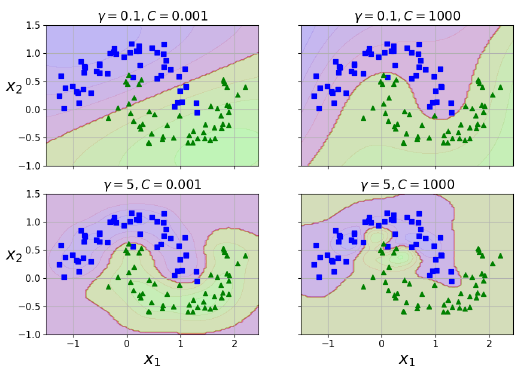

#### SVM 회귀

- 선형 회귀

In [17]:
np.random.seed(2020) 
m = 50 
X = 2 * np.random.rand(m, 1) 
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [18]:
from sklearn.svm import LinearSVR 
svm_reg = LinearSVR(epsilon=1.5, random_state=2020) 
svm_reg.fit(X, y)

LinearSVR(epsilon=1.5, random_state=2020)

- 비선형회귀

In [19]:
np.random.seed(2020) 
m = 100 
X = 2 * np.random.rand(m, 1) - 1 
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

from sklearn.svm import SVR 

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale") 
svm_poly_reg.fit(X, y)

SVR(C=100, degree=2, kernel='poly')

### ML6 - Decision Tree
- 분류/회귀/다중출력

#### 분류나무
- max_depth : 트리의 최대 깊이
- min_samples_split: 분할을 위해 노드가 가져야 하는 최소 샘플수
- min_samples_leaf: 리프노드가 가지고 있어야 할 최소 샘플수
- min_weight_fraction_leaf: 가중차기 부여된 전체 샘플수에서의 최소 비율
- max_leaf_nodes: 리프노드의 최대 수
- max_features : 각 노드에서 분할에 이용할 특성의 최대수

In [23]:
from sklearn.datasets import load_iris 
from sklearn.tree import DecisionTreeClassifier, plot_tree

iris = load_iris() 
X = iris.data[:, 2:] 
y = iris.target 

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42) 
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

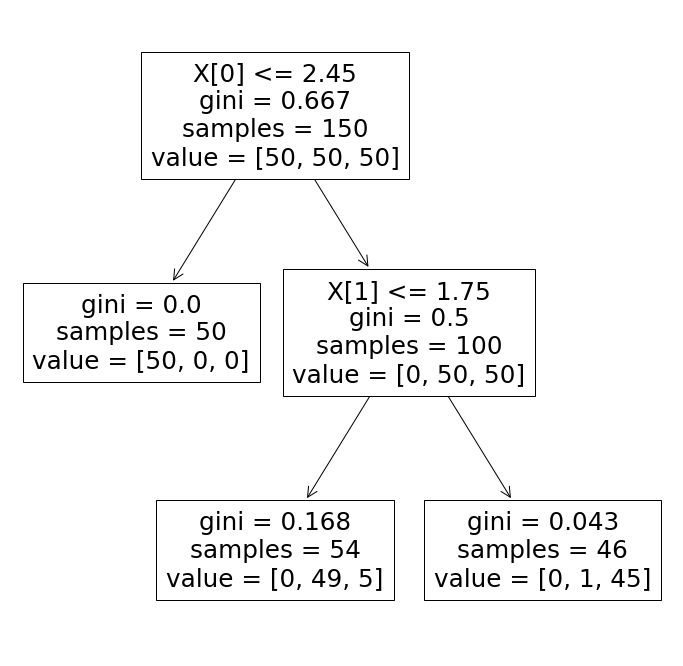

In [25]:
plt.figure(figsize=(12,12))
plot_tree(tree_clf);

- 클래스 확률 추정

In [26]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [27]:
tree_clf.predict([[5, 1.5]])

array([1])

#### 회귀나무

In [29]:
np.random.seed(42) 
m = 200 
X = np.random.rand(m, 1) 
y = 4 * (X - 0.5) ** 2 
y = y + np.random.randn(m, 1) / 10

from sklearn.tree import DecisionTreeRegressor 

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42) 
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

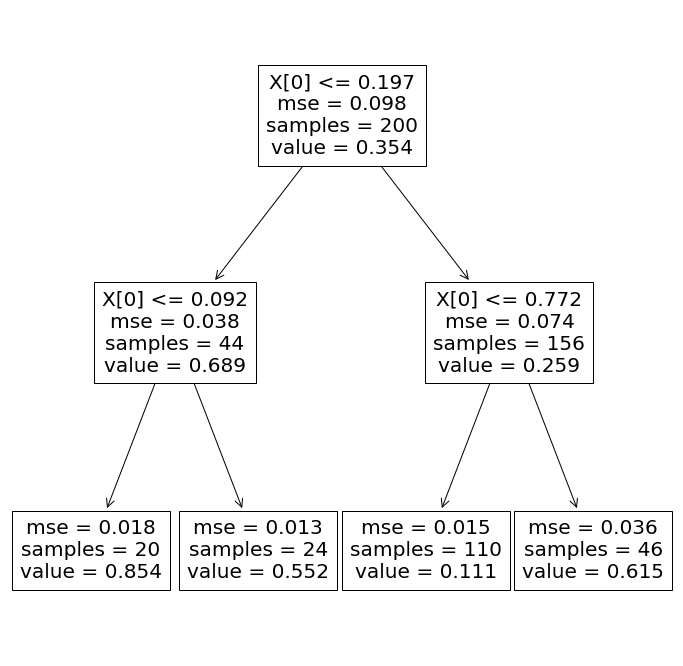

In [30]:
plt.figure(figsize=(12,12))
plot_tree(tree_reg);

### ML7: Ensemble & Random Forest

#### VotitngClassifier
- logistic regression / random forest / svc 이용
- 여기서는 voting="hard"를 썼는데 soft를 쓸 수도 있음!

In [5]:
from sklearn.model_selection import train_test_split 
from sklearn.datasets import make_moons 

X, y = make_moons(n_samples=500, noise=0.30, random_state=2020) 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2020)

from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import VotingClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 

log_clf = LogisticRegression(solver="lbfgs", random_state=2020) 
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=2020) 
svm_clf = SVC(gamma="scale", random_state=2020) 

voting_clf = VotingClassifier( 
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')


voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=2020)),
                             ('rf', RandomForestClassifier(random_state=2020)),
                             ('svc', SVC(random_state=2020))])

In [32]:
#각 분류기의 정확도 확인
from sklearn.metrics import accuracy_score 

for clf in (log_clf, rnd_clf, svm_clf, voting_clf): 
    clf.fit(X_train, y_train) 
    y_pred = clf.predict(X_test) 
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.856
RandomForestClassifier 0.936
SVC 0.952
VotingClassifier 0.944


#### 배깅

In [33]:
from sklearn.ensemble import BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier( 
    DecisionTreeClassifier(random_state=2020), 
    n_estimators=500, max_samples=100, 
    bootstrap=True, random_state=2020) 

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score 
print(accuracy_score(y_test, y_pred))

0.936


배깅 함수에서 bootstrap=Fale로 바꾸면 pasting         
: 중복을 허용하지 않은 샘플링

In [36]:
# oob 평가
bag_clf = BaggingClassifier( DecisionTreeClassifier(), 
                            n_estimators=500, bootstrap=True, 
                            random_state=2020,n_jobs=1,oob_score=True) 

bag_clf.fit(X_train, y_train)

bag_clf.oob_score_

0.896

In [37]:
from sklearn.metrics import accuracy_score 
y_pred = bag_clf.predict(X_test) 
accuracy_score(y_test,y_pred)

0.944

#### 랜덤포레스트
max_samples로 훈련 세트 크기지정

In [38]:
from sklearn.ensemble import RandomForestClassifier 
rnd_clf = RandomForestClassifier(
    n_estimators=500, max_leaf_nodes=16, random_state=2020) 
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)
np.sum(y_test == y_pred_rf) / len(y_test)

0.952

* bagging으로 랜덤포레스트와 유사하게

In [8]:
from sklearn.ensemble import BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier( 
    DecisionTreeClassifier(max_features="auto",max_leaf_nodes=16), 
    n_estimators=500,max_samples=1.0,bootstrap=True) 
bag_clf.fit(X_train, y_train)

y_pred_bag = bag_clf.predict(X_test) 
np.sum(y_test == y_pred_bag) / len(y_test)

0.944

- extra tree: 랜덤포레스트 중 극단적으로 무작위한 트리

In [9]:
from sklearn.ensemble import ExtraTreesClassifier 

extra_clf = ExtraTreesClassifier(n_estimators=500, random_state=2020) 
extra_clf.fit(X_train, y_train)

y_pred_extra = extra_clf.predict(X_test) 
np.sum(y_test == y_pred_extra) / len(y_test)

0.944

- 특성의 중요도 파악

In [10]:
from sklearn.datasets import load_iris 

iris = load_iris() 
rnd_clf = RandomForestClassifier(n_estimators=500, random_state=2020) 
rnd_clf.fit(iris["data"], iris["target"])

for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_): 
    print(name, score)

sepal length (cm) 0.09501962624467897
sepal width (cm) 0.0228520675895898
petal length (cm) 0.42653720447161725
petal width (cm) 0.45559110169411393


#### 부스팅

- Adaboost

In [11]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier( DecisionTreeClassifier(max_depth=1), 
                             n_estimators=200,algorithm="SAMME.R", 
                             learning_rate=0.5, random_state=2020) 
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200, random_state=2020)

- gradient boosting

In [12]:
from sklearn.ensemble import GradientBoostingRegressor 
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3,   #예측기가 부족한편
                                 learning_rate=1.0, random_state=2020) 
gbrt.fit(X, y)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3,
                          random_state=2020)

### ML8 - Dimension reduction

#### PCA

In [13]:
from sklearn.decomposition import PCA 

pca = PCA(n_components = 2) 
X2D = pca.fit_transform(X)

In [15]:
pca.components_

array([[ 0.95654611, -0.29158111],
       [ 0.29158111,  0.95654611]])

In [16]:
pca.explained_variance_ratio_

array([0.75828232, 0.24171768])